# 决策树解决回归问题

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

X = boston.data
y = boston.target

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [5]:
dt_reg.score(X_test, y_test)

0.6046246412717724

In [6]:
dt_reg.score(X_train, y_train)

1.0

很明显模型泛化能力很差，发生了过拟合

In [7]:
from sklearn.metrics import mean_squared_error

def plot_learning_curve(algo, X_train, X_test, y_train, y_test, axis_x=None, axis_y=None):
    train_score = []
    test_score = []
    for i in range(1, X_train.shape[0] + 1):
    
        algo.fit(X_train[:i], y_train[:i])
    
        y_predict_train = algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i], y_predict_train))
    
        y_predict_test = algo.predict(X_test)
        test_score.append(mean_squared_error(y_test, y_predict_test))
        
    plt.plot([i for i in range(1, X_train.shape[0] + 1)], np.sqrt(train_score), label='train')
    plt.plot([i for i in range(1, X_train.shape[0] + 1)], np.sqrt(test_score), label='test')
    plt.legend()
    if axis_x is not None and axis_y is not None:
        plt.axis([0, axis_x, 0, axis_y])
    plt.show()

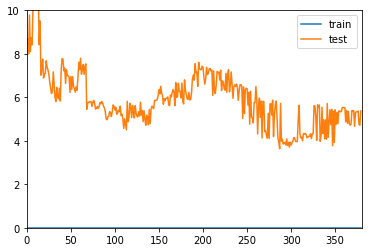

In [8]:
plot_learning_curve(dt_reg
                    , X_train, X_test, y_train, y_test, len(X_train)+1, 10)

可以看到学习曲线，很明显的过拟合